# Project: Investigate a Dataset (IMDB Movie Data)
> The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib. This contain four parts:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
    this code is written by Abdulrhman Alahamdi
    please do Not use without my consent
    contact me: alahmadi1999@gmail.com
## Dataset
- IMDB was the best choice for me as i love movies and i'm intrested in the findings of several questions

## Questions:
- What are the top rated movies?
- what is the most proftable year ?
- does size(time) matter?
- is popularity decreasing?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After Observing the dataset and the questions related to this dataset for the analysis we will be keeping only relevent data and deleting the unused data.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Read the CSV File Using Pandas read_csv function

df = pd.read_csv('tmdb-movies.csv')   

#lets see what we have in our data base
df.shape


(10866, 21)

In [3]:
# i wanted to take a peek into the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#exploring the data as i want to see the revenue and budget stats
#while also looking at others
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#let's check  the null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning (Removing The Unused Information From The Dataset)
cleaning requirements
1. fixing the date problem
2. We need to remove duplicate rows and fill the null values
3. Remove unnecessery columns.

1. Fixing Release Date

In [6]:
#just like class we'll change this in datetime format

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].tail()

10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, dtype: datetime64[ns]

2. Remove Duplicate Rows and fix null values

In [7]:
#replacing null values using fillna
df.fillna(0)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,0,Bruce Brown,0,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,0,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,0,Eldar Ryazanov,0,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,0,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.000000e+00


In [8]:
#removing duplcates which was only one suprisingly
df.drop_duplicates(inplace = True)

3. Remove unnecessery columns


In [9]:
#there are some columns we won;t be using so we will drop them
df.drop(['imdb_id','homepage','revenue_adj','budget_adj','overview','tagline'],axis =1,inplace = True)


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### Research Question 1 : What are the top rated movies?


Text(0.5, 0, 'Rating')

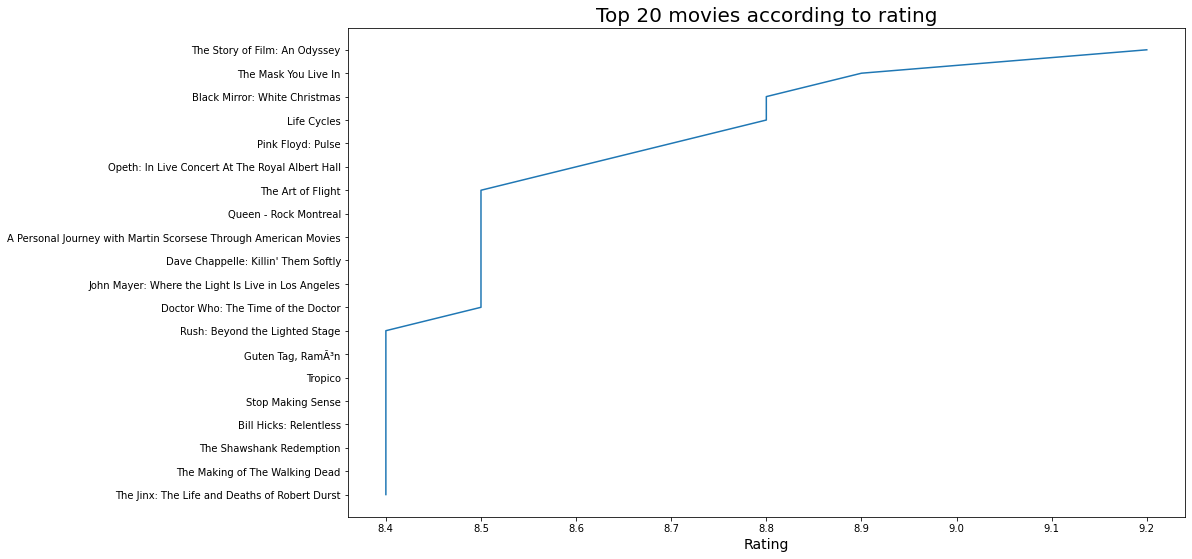

In [10]:
# cratinf a df with the needed clumns
df_rating = df[['original_title','vote_average']]

#creating the plot data
a= df_rating.sort_values(by='vote_average', ascending=False).head(20).original_title
x = a
b= df_rating.sort_values(by='vote_average', ascending=False).head(20).vote_average
y = b




#creating the plot
plt.figure(figsize=(15,9))
plt.plot(y,x)
#inverting it so it becomes pleasing
plt.gca().invert_yaxis()

plt.title("Top 20 movies according to rating",fontsize = 20)
plt.xlabel("Rating",fontsize = 14)

findnig the  The Story of Film: An Odyssey was number one and the shawshank redmption was a shock but this might be due to older data 

this provked me to seek an answer 

In [11]:
#checking my reults since i had doubts
print(a , b)
print(df['vote_average'].max())

3894                        The Story of Film: An Odyssey
538                                  The Mask You Live In
1200                        Black Mirror: White Christmas
2269                                          Life Cycles
6911                                    Pink Floyd: Pulse
2401      Opeth: In Live Concert At The Royal Albert Hall
3690                                    The Art of Flight
8411                                Queen - Rock Montreal
8221    A Personal Journey with Martin Scorsese Throug...
8839                  Dave Chappelle: Killin' Them Softly
3224    John Mayer: Where the Light Is Live in Los Ang...
5830                   Doctor Who: The Time of the Doctor
2334                       Rush: Beyond the Lighted Stage
5986                                    Guten Tag, RamÃ³n
5923                                              Tropico
7948                                    Stop Making Sense
8370                               Bill Hicks: Relentless
4178          

it appears that the shawshank redmption is really # 1 as it has 8.4 rating

### Research Question 2 : what is the most proftable year ?


0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: Profit, Length: 10865, dtype: int64


Text(0, 0.5, 'Average profit')

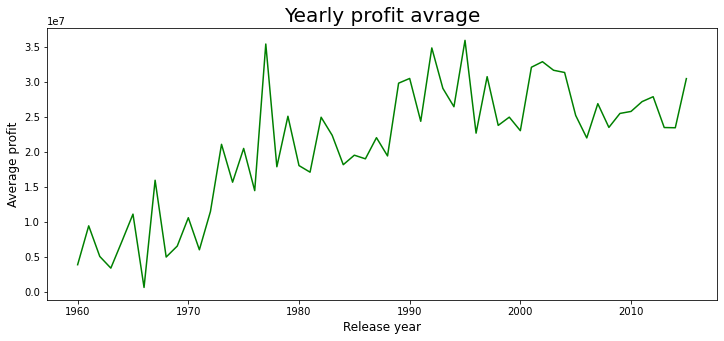

In [12]:
#calculating profit
df['Profit'] = df['revenue'] - df['budget']

#looking at data
print(df['Profit'])
# the only sloution i could find is the group by method
plt.figure(figsize=(12,5))
plt.plot(df.groupby('release_year')['Profit'].mean(), color= 'green',)
plt.xlabel('Release year',fontsize = 12)
plt.title('Yearly profit avrage',fontsize = 20)
plt.ylabel('Average profit',fontsize = 12)

it was amazing to see this and know that the peek of the industry was in 1977, how ever in the early 00's it had a few good years. also around 1965 the was a sharp drop so i wanted to know what was the best and the worst of all time

In [13]:
#checking results
print("the best ",df['Profit'].max())
print("the worst",df['Profit'].min())

the best  2544505847
the worst -413912431


### Research Question 3 : does size(time) matter?


Text(0, 0.5, 'Runtime')

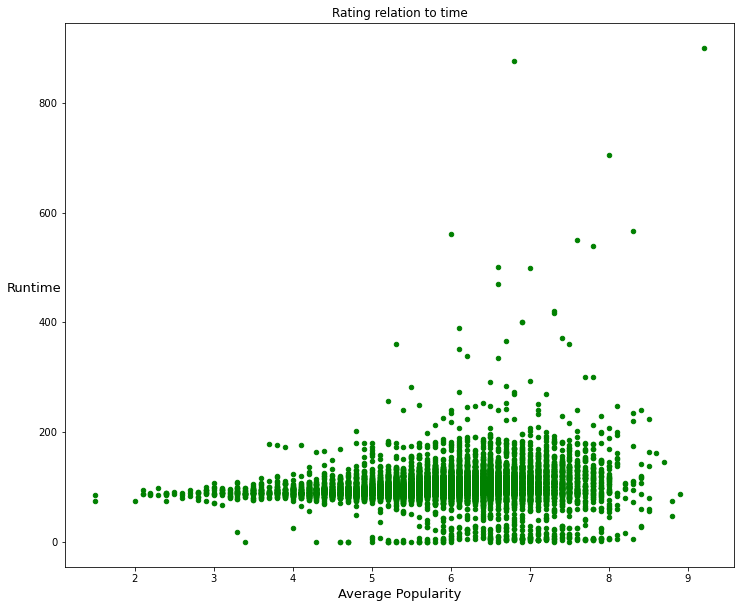

In [14]:
#curious check
df['vote_average'].max()
#chose a scatter plot as it's the best to see the info
#created the plot
df.plot('vote_average', 'runtime',title='Rating relation to time',color= 'green' ,kind='scatter', figsize=(12,10))


#editing the plot
plt.xlabel('Average Popularity',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13,rotation = 0)

It appears that it does matter and the popularity peeks between 90 to 120 minutes of course there are some exceptions but they are really rare

i wanted to get a deeper  understanding of the time of the movies and i want to know what is the distrbution of it


Text(0, 0.5, 'Number of films')

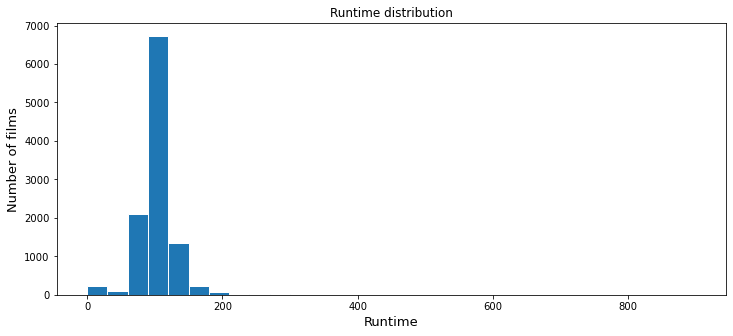

In [15]:
#creating a histogram
plt.figure(figsize=(12,5))

plt.hist( df['runtime'], bins =30, edgecolor='w');

#editing the hist
plt.title('Runtime distribution')
plt.xlabel('Runtime',fontsize = 13)
plt.ylabel('Number of films',fontsize = 13)

most movies aim to be in the perfect time 90 to 120 but about 2000 films has less time and 1500 has more time

### Reasearch Question 4: is popularity decreasing?


Text(0.5, 0, 'year')

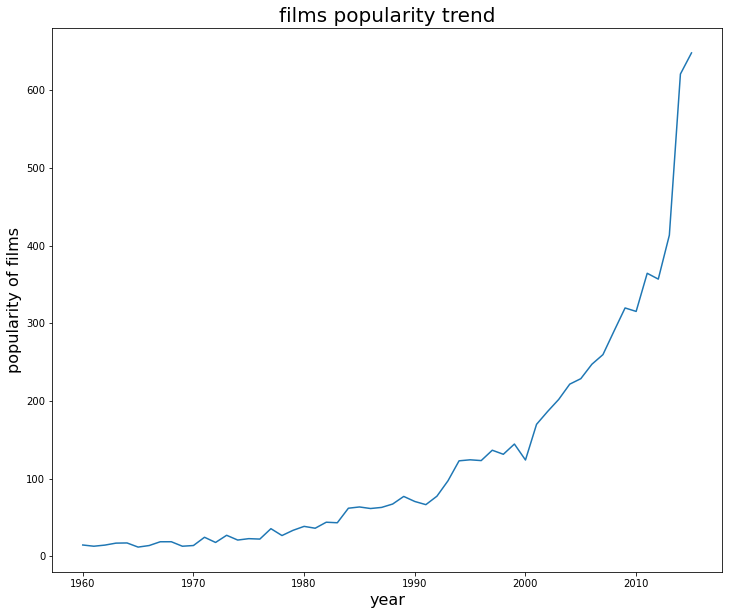

In [16]:
#creating the plot
plt.title("films popularity trend",fontsize=20)
#plot info using groupby and sum function
df.groupby('release_year')['popularity'].sum().plot(figsize=(12,10))
plt.ylabel('popularity of films',fontsize=16,)
plt.xlabel('year',fontsize= 16)


i assumed the industry is at a decline, how ever there is a steep incline  around 2012 and going strong till the end of the data

<a id='conclusions'></a>
## Conclusions

> 
this was an intresting deep dive first project and i enjoyed every challange and learend from it.
here are the answers to my questions:

### What are the top rated movies?
- The Story of Film: An Odyssey has the best rating and the top movies don't fall under 8.4 rating.

### what is the most proftable year ?
- 1977 was the most proftibale the trend seems to be going up genrally.

### does size(time) matter?
- of course, most movies with high scores were between 90 - 120 minutes.

### is popularity decreasing?
- not at all the intrest never decreased, in fact the last decade had a huge leap in popularity.


 
## limitations: 

- the data is not 100% acurate as i didn't do any statistical opretions except the basic ones
- the efficiency of the code was not a priorty hence, it won't work with a large set of data
- the sample needs an update as data has changed significantly in the past 3 years 
- i'm still not an expert yet in dealing with data, so there must be missed insights

## resources:
 - i looked and used some of the offical documantion for numpy, pandas, matplotlib, python
 - also i took inspiration from https://www.youtube.com/watch?v=4Tds_P36-W0